# Modellazione seconda ondata

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

In [5]:
# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

## Lettura e preprocessing dati

In [38]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

giorni=np.array([g[:10] for g in giorni])

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 189
Primo giorno: 2020-02-24
Ultimo giorno: 2020-08-30


## Plot second wave

In [50]:
# si fissa l'inizio della second wave prendendo un giorno di riferimento
sw_first_day=115

print('Giorno riferimento seconda ondata: ',end='')
print(giorni[sw_first_day][:10])

Giorno riferimento seconda ondata: 2020-06-18


In [51]:
# indicatori da plottare
indicatori_selected=['nuovi_positivi',
                    'variazione_totale_positivi',
                    'totale_positivi',
                    'deceduti_giornalieri']

In [52]:
# per i subplot determina la griglia
grid_shape=(2,2)
grid_seq=get_subplot_cells_sequence(grid_shape)

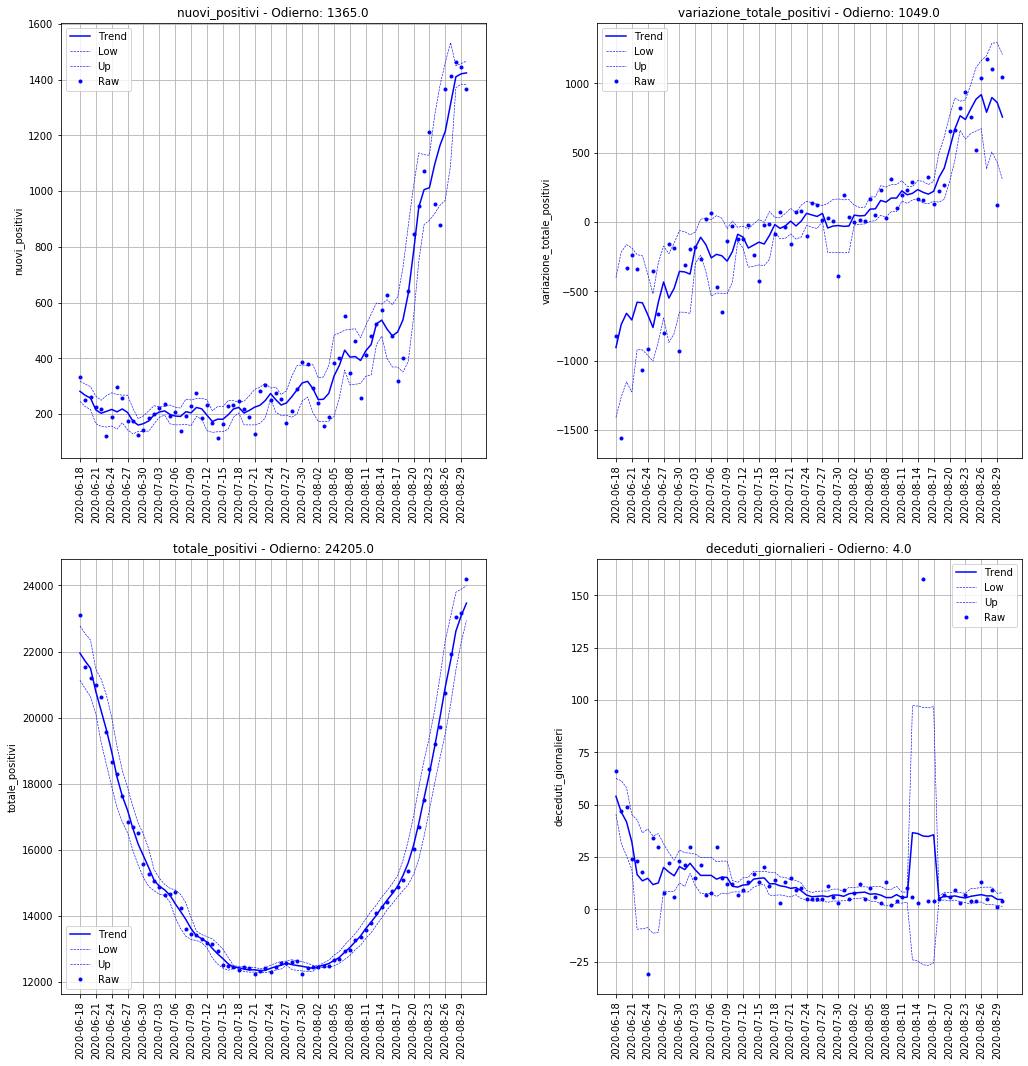

In [53]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
fig.tight_layout(pad=8.0)
for i,indicatore in enumerate(indicatori_selected):
    # stampo il plot smooth con intervallo di confidenza
    confplot_ax(day_counter[sw_first_day:],
                   trend[indicatore]['Italia'][sw_first_day:],
                   window=(2,2),ax=ax[grid_seq[i]],conf_fun='deviation')
    ax[grid_seq[i]].set_title(indicatore+' - Odierno: %.1f'%trend[indicatore]['Italia'][-1])
    #ax[grid_seq[i]].set_xlabel('Giorni dal %s al %s'%(giorni[sw_first_day],giorni[-1]))
    ax[grid_seq[i]].set_ylabel(indicatore)
    # stampo anche a punti il dato raw
    ax[grid_seq[i]].plot(day_counter[sw_first_day:],trend[indicatore]['Italia'][sw_first_day:],'b.')
    ax[grid_seq[i]].legend(['Trend','Low','Up','Raw'])
    ax[grid_seq[i]].grid()
    ax[grid_seq[i]].set_xticks(list(range(sw_first_day,len(giorni),3)))
    ax[grid_seq[i]].set_xticklabels(giorni[list(range(sw_first_day,len(giorni),3))],rotation=90)
